In [1]:
## Load required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## define directory
dir_path = os.path.abspath('')
print(dir_path)
os.chdir('..')
from pyCiSSA.pycissa import cissa, group

/home/luke/MEGA/Python stuff/Projects/2022/CiSSA/Python/pycissa/test_example


In [3]:
## Read data file  (source is the Ministry of Economy of Spain.)
print(dir_path)
data = pd.read_excel(dir_path + r'/EPC.xlsx',sheet_name = 'Data')
print(data.head(5))

/home/luke/MEGA/Python stuff/Projects/2022/CiSSA/Python/pycissa/test_example
        Date  Electric power consumption in Spain
0 1975-01-01                               6875.3
1 1975-02-01                               6201.8
2 1975-03-01                               6543.6
3 1975-04-01                               6267.2
4 1975-05-01                               5870.2


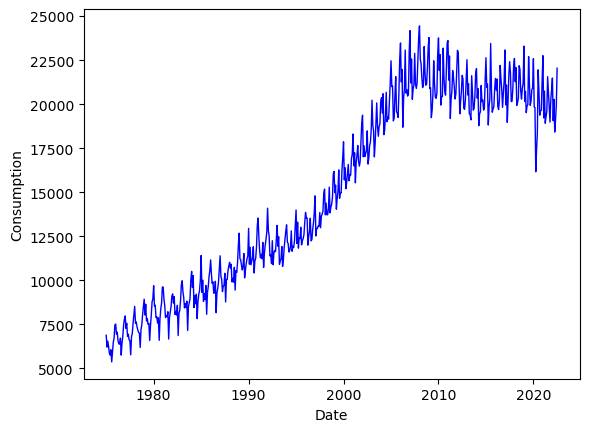

In [4]:
## Plot the data
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0)
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

In [5]:
## Define parameters  (https://github.com/jbogalo/CiSSA/issues/2#issuecomment-1296310840)
L = 96
data_per_year = 12

In [6]:
## Run CiSSA and group components
#1) Run CiSSA
Z, psd = cissa(data['Electric power consumption in Spain'],L)

#2) Group components
rc, sh, kg = group(Z,psd,data_per_year)


dict_keys(['seasonality', 'long term cycle', 'trend', 'noise'])


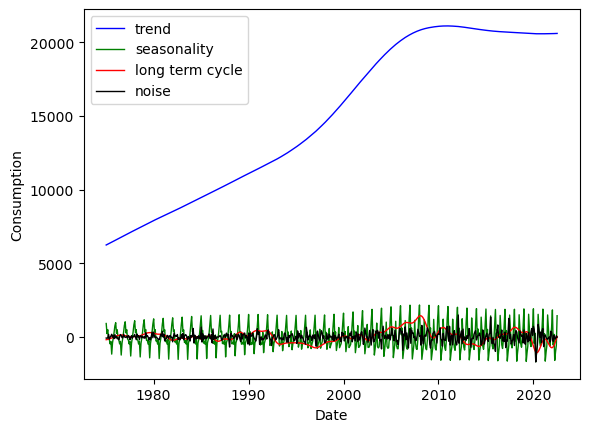

In [7]:
## Plot grouped components
print(rc.keys())

plt.plot(data['Date'], rc['trend'], 'b', lw=1.0, label = 'trend')
plt.plot(data['Date'], rc['seasonality'], 'g', lw=1.0, label = 'seasonality')
plt.plot(data['Date'], rc['long term cycle'], 'r', lw=1.0, label = 'long term cycle')
plt.plot(data['Date'], rc['noise'], 'k', lw=1.0, label = 'noise')
plt.legend(loc="upper left")
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

In [8]:
## Load Matlab Results
results = pd.read_excel(dir_path + r'/EPC.xlsx',sheet_name = 'rc')
psd_results = pd.read_excel(dir_path + r'/EPC.xlsx',sheet_name = 'psd',header = None)
Z_results = pd.read_excel(dir_path + r'/EPC.xlsx',sheet_name = 'Z',header = None)

In [9]:
## Error in psd
percentage_error = []
for python_psd,matlab_psd in zip(psd,psd_results.values):
    percentage_error.append((python_psd-matlab_psd)/matlab_psd*100)

print('PSD maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    

PSD maximum absolute error (percentage) =  4.495865134894015e-11 %


In [10]:
## Error in Z
percentage_error = []
for python_z,matlab_z in zip(Z,Z_results.values):
    percentage_error.append((python_z-matlab_z)/matlab_z*100)

print('Z maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    


Z maximum absolute error (percentage) =  1.0688557078773287e-08 %


In [11]:
## Error in trend component
percentage_error = []
for python_j,matlab_j in zip(rc['trend'],results['Trend'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Trend maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')    

Trend maximum absolute error (percentage) =  5.350411483953365e-13 %


In [12]:
## Error in seasonality component
percentage_error = []
for python_j,matlab_j in zip(rc['seasonality'],results['Seasonality'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Seasonality maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')   



Seasonality maximum absolute error (percentage) =  2.5661006380041813e-11 %


In [13]:
## Error in long term cycle component
percentage_error = []
for python_j,matlab_j in zip(rc['long term cycle'],results['Business cycle'].values):
    percentage_error.append((python_j-matlab_j)/matlab_j*100)

print('Business cycle maximum absolute error (percentage) = ',np.max(np.abs(percentage_error)),'%')   

Business cycle maximum absolute error (percentage) =  7.2077060893260445e-09 %
